In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Imported')

Imported


In [2]:
df = pd.read_csv('health care diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

# 1. Data Exploration

In [5]:
df[['Glucose','BloodPressure','Insulin','SkinThickness','BMI']].describe() # Non of these values can be zero

,Glucose,BloodPressure,Insulin,SkinThickness,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,20.536458,31.992578
std,31.972618,19.355807,115.244002,15.952218,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,30.500000,23.000000,32.000000
75%,140.250000,80.000000,127.250000,32.000000,36.600000
max,199.000000,122.000000,846.000000,99.000000,67.100000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### There are no missing values but the min is 0

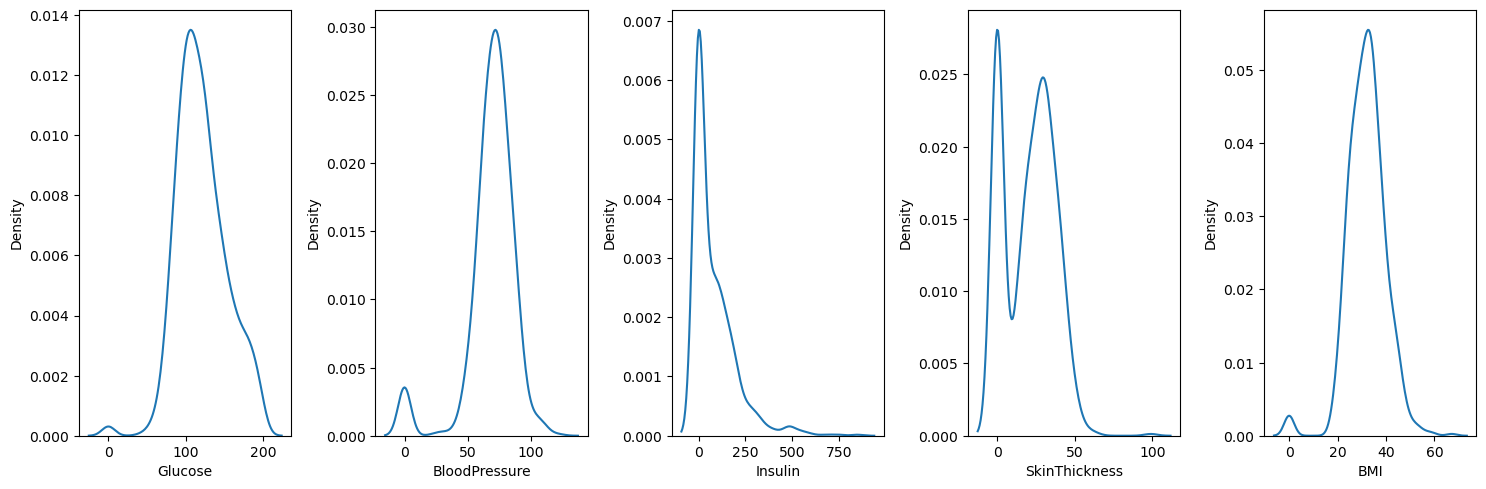

In [8]:
# histograms of these variables
f,ax=plt.subplots(1,5,figsize=(15,5))
sns.distplot(df['Glucose'],ax=ax[0],hist=False)
sns.distplot(df['BloodPressure'],ax=ax[1],hist=False)
sns.distplot(df['Insulin'],ax=ax[2],hist=False)
sns.distplot(df['SkinThickness'],ax=ax[3],hist=False)
sns.distplot(df['BMI'],ax=ax[4],hist=False)
plt.tight_layout()
plt.show()

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Replace 0 with Median
var=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in var:
    df[i].replace(0,df[i].median(),inplace=True)

In [10]:
df[['Glucose','BloodPressure','Insulin','SkinThickness','BMI']].describe()

,Glucose,BloodPressure,Insulin,SkinThickness,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,94.652344,27.334635,32.450911
std,30.438286,12.096642,105.547598,9.229014,6.875366
min,44.000000,24.000000,14.000000,7.000000,18.200000
25%,99.750000,64.000000,30.500000,23.000000,27.500000
50%,117.000000,72.000000,31.250000,23.000000,32.000000
75%,140.250000,80.000000,127.250000,32.000000,36.600000
max,199.000000,122.000000,846.000000,99.000000,67.100000


#### No variable has a minimum of 0.

### Count Plots

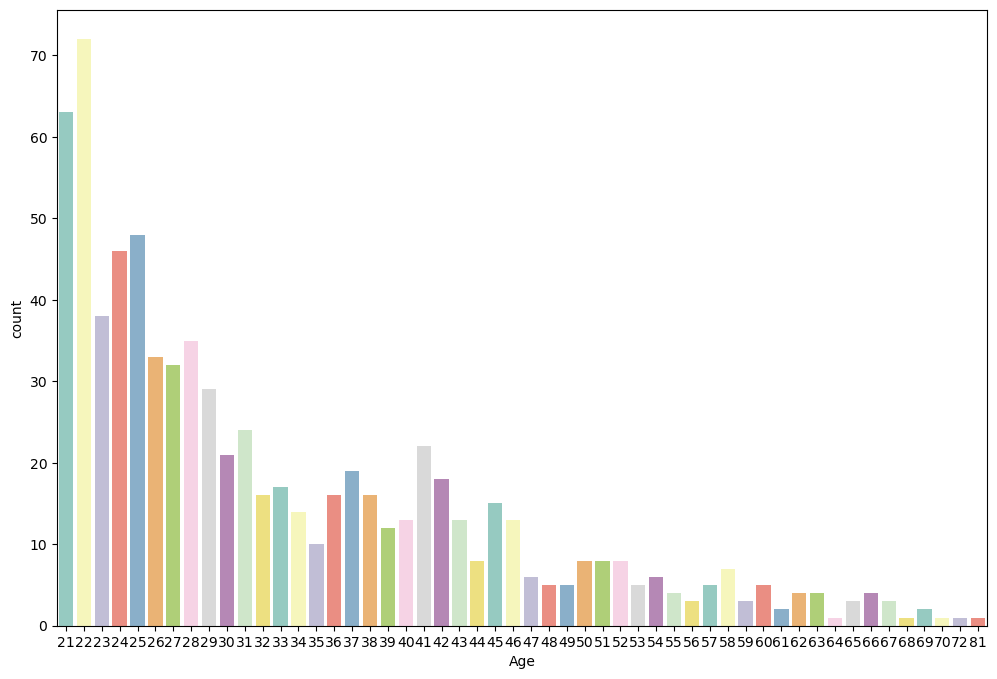

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['Age'],palette='Set3')
plt.show()

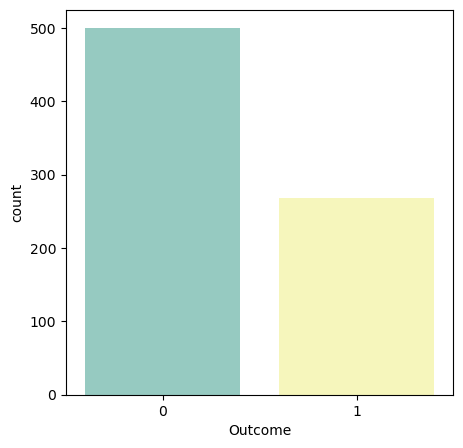

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Outcome'],palette='Set3')
plt.show()

#### The data is imbalanced.

### Scatterplots

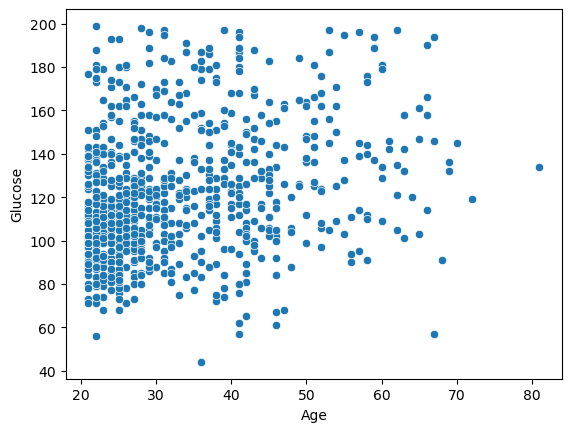

In [14]:
sns.scatterplot(x=df['Age'],y=df['Glucose'])
plt.show()

#### There is no significant relationship between 'Age' and 'Glucose'.

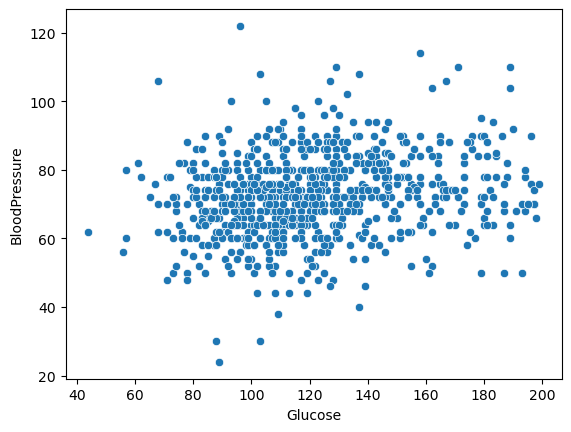

In [15]:
sns.scatterplot(x=df['Glucose'],y=df['BloodPressure'])
plt.show()

#### There is no significant relationship between 'BloodPressure' and 'Glucose'.

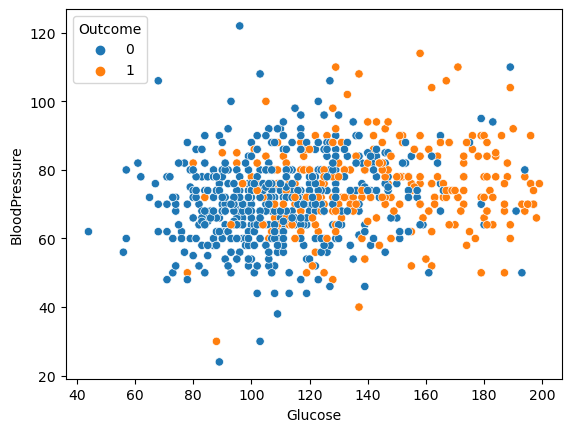

In [16]:
sns.scatterplot(x=df['Glucose'],y=df['BloodPressure'],hue='Outcome',data=df)
plt.show()

#### Higher glucose levels are associated with an increased risk of developing diabetes and vice versa. There is no significant relationship between 'BloodPressure' and developing Diabetes.

In [17]:
corr=df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


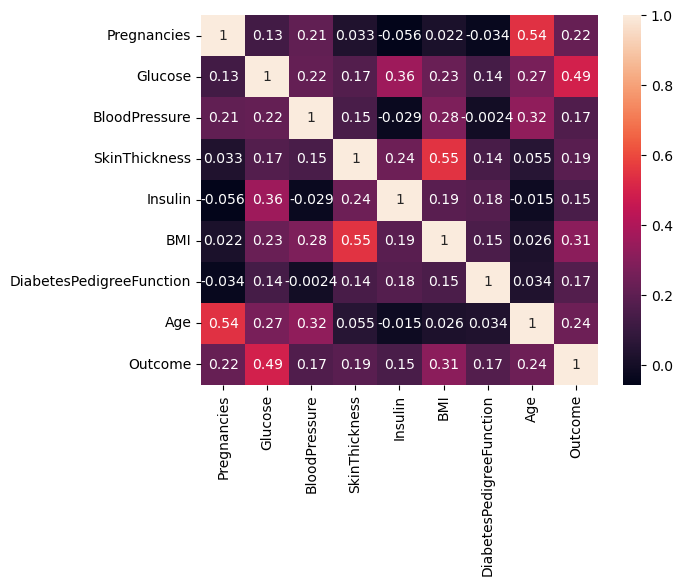

In [18]:
# Heatmap
sns.heatmap(corr,annot=True)
plt.show()

# 2. Data Modeling

In [19]:
# create Independent & dep variable
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [20]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# print the shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


### Logistic Regression Model

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [22]:
# give training
lr.fit(X_train,y_train)
print('Training completed')

Training completed


In [23]:
# prediction
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [24]:
# confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[83 16]
 [19 36]]


In [25]:
print('Accuracy of logistic Regression model',accuracy_score(y_test,y_pred))

Accuracy of logistic Regression model 0.7727272727272727


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [27]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

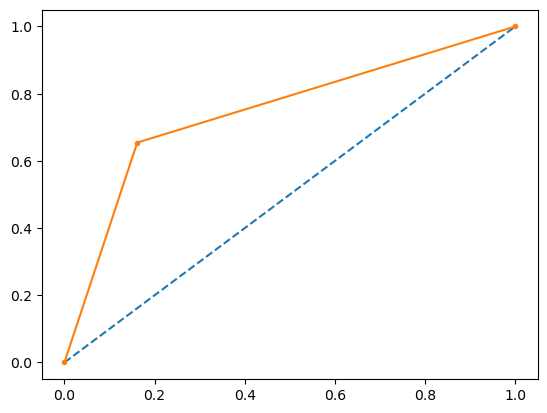

In [28]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [29]:
# print roc_auc_score
print('roc_auc_score',roc_auc_score(y_test,y_pred))

roc_auc_score 0.7464646464646464


In [30]:
# apply scaling on data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [32]:
rfc.fit(X_train,y_train)
print('Training Completed')

Training Completed


In [33]:
y_pred=rfc.predict(X_test)

In [34]:
# calculate accuracy
print('Accuracy of Random Forest Classifier',accuracy_score(y_test,y_pred))

Accuracy of Random Forest Classifier 0.7532467532467533


In [35]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

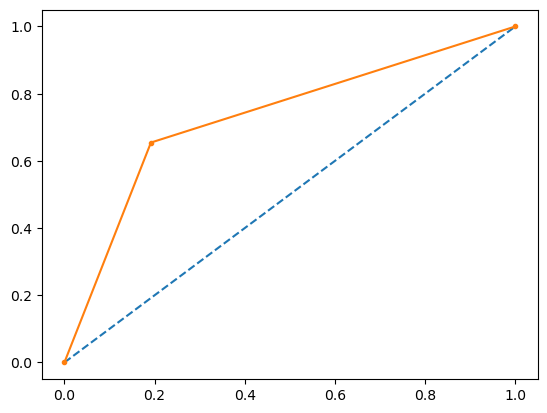

In [36]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

### KNN Model

In [37]:
# apply knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred_knn=knn.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred_knn)

0.7532467532467533

In [41]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,y_pred_knn)

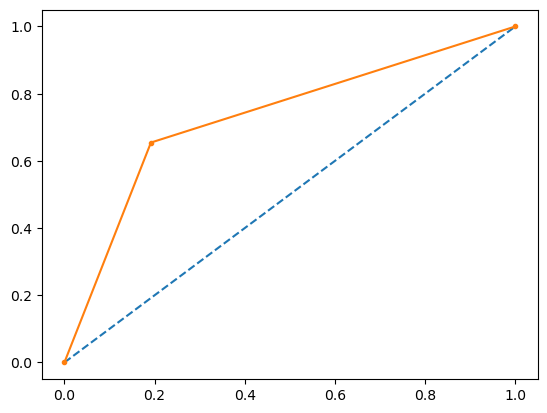

In [42]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

In [43]:
print('roc_auc_score',roc_auc_score(y_test,y_pred_knn))

roc_auc_score 0.7313131313131312


### The Logistic Regression model performs better than the KNN and Random Forest models.